[-0.72990723  0.0588164 ]

Type1 wine:
 [0, 1, 2, 3, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 41, 42, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 70, 73, 74, 95, 144, 145, 157, 175, 176]

Type2 wine:
 [4, 20, 21, 39, 40, 43, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 71, 72, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 96, 97, 98, 99, 100, 101, 102, 103, 104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129, 130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142, 143, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155, 156, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168, 169, 170, 171, 172, 173, 174, 177]


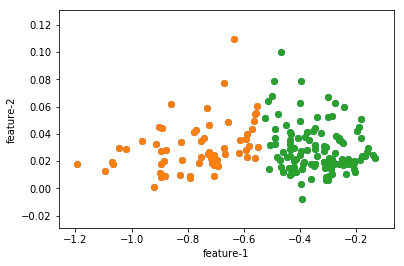

In [63]:
#import library
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import math



#calculate the euclidian distance
def euclidian_distance(x,y):
    return(math.sqrt(pow(x[0]-y[0],2)+pow(x[1]-y[1],2)))
           

#determine if a training example is close to cluster1 or cluster2            
def clusters(cluster1,cluster2,final_features,centroid1,centroid2):
    for i in range(row):
        dist_c1=euclidian_distance(final_features[i],centroid1)
        dist_c2=euclidian_distance(final_features[i],centroid2)
        if dist_c1 < dist_c2:
            cluster1.append(i)
        else:
            cluster2.append(i)                
            
            
            
#determining the mean centroid
def mean_centroid(cluster1,cluster2,final_features,centroid1,centroid2):
    centroid1=[0,0]
    centroid2=[0,0]
    for i in cluster1:
        centroid1[0]+=final_features[i][0]
        centroid1[1]+=final_features[i][1]
    centroid1[0]=centroid1[0]/len(cluster1)
    centroid1[1]=centroid1[1]/len(cluster1)
    for j in cluster2:
        centroid2[0]+=final_features[j][0]
        centroid2[1]+=final_features[j][1]
    centroid2[0]=centroid2[0]/len(cluster2)
    centroid2[1]=centroid2[1]/len(cluster2)
              
#plotting the clusters
def plot(cluster,final_features):
    X=[]
    Y=[]
    for i in cluster:
        X.append(final_features[i][0])
        Y.append(final_features[i][1])
    plt.scatter(X,Y, marker='o')
    plt.xlabel("feature-1")
    plt.ylabel("feature-2") 

    
#main function    
def main():          
           
    #reading a csv file
    df=pd.read_csv("wine.csv")
    a=[]
    b=[]
    col=len(df.columns)
    row=len(df.index)


    #storing mean and min - max for each column
    for i in range(col-1):
        x=df.loc[i].mean()                 
        y=df.loc[i].max()-df.loc[i].min()
        a.append(x)
        b.append(y)

    m=[]
    lis=np.array(df)


    #mean normalization
    for i in range(row):
        for j in range(col-1):
            z=(lis[i,j]-a[j])/b[j]
            m.append(z)

    m=np.reshape(m,(row,col-1))    


    #dimensionality reduction to 2-d
    pcomp=2

    #covariance matrix
    m=np.transpose(m)
    cov_mat=np.cov(m)

    #computing n(number of features) eigen vectors
    eigen_values, eigen_vectors= np.linalg.eig(cov_mat)

    #considering only 2(pcomp=2) columns
    eigen_vectors=eigen_vectors[:,:2]
    eigen_vectors=np.transpose(eigen_vectors)

    #computing final features for each training example
    final_features=np.matmul(eigen_vectors,m)
    final_features=np.transpose(final_features)

    #plotting
    X=final_features[:,0]
    Y=final_features[:,1]
    plt.scatter(X,Y, marker='o')
    plt.xlabel("feature11")
    plt.ylabel("feature22")    

    
    #clustering the wines into 2 parts
    pcluster1=[]
    pcluster2=[]
    cluster1=[]
    cluster2=[]

    #sorting the data in ascending order to initialize the centroids
    sorted(final_features, key=lambda x: x[0])
    centroid1=final_features[0].copy()
    centroid2=final_features[-1].copy()

    #finding clusters based on initial centroids
    clusters(pcluster1,pcluster2,final_features,centroid1,centroid2)           
    mean_centroid(pcluster1,pcluster2,final_features,centroid1,centroid2)
    
    
    i=1
    #repeat until there are no more changes in the cluster(find cluster and then find the mean centroid)
    while i!=0:
        cluster1.clear()
        cluster2.clear()
        clusters(cluster1,cluster2,final_features,centroid1,centroid2)
        cluster1.sort()
        pcluster1.sort()
        if cluster1==pcluster1:
               break
        else:
               pcluster1=cluster1.copy()
               pcluster2=cluster2.copy()
        mean_centroid(cluster1,cluster2,final_features,centroid1,centroid2)

    #printing the clusters
    print("\nType1 wine:\n",cluster1)
    print("\nType2 wine:\n",cluster2)
    
    #plotting the clusters
    plot(cluster1,final_features)
    plot(cluster2,final_features) 
           
           
if __name__ =='__main__':
    main() 
